<font size='3'> 
**Warming up**:   
1. Create a statistical summary table for the dataframe 'professor'
2. Select the 'Department' value for professor 'Jack' using iloc.
3. Create a bar plot with x-axis the 'Name' and y-axis the 'Salary' using plt.bar()
</font>

In [1]:
import pandas as pd
professor = pd.DataFrame([['Chris','Bio',8,100000],['Jack','Math',2,80000],['Julia','Stats',6,90000]], 
                         columns = ['Name','Department','Experience_in_yrs','Salary'])
professor

,Name,Department,Experience_in_yrs,Salary
0,Chris,Bio,8,100000
1,Jack,Math,2,80000
2,Julia,Stats,6,90000


***
<font size='3'> 
**At the end of today, you'll be able to**:
1. Learn the basic Machine Learning concepts 
2. Learn the most commonly used ML models and their implementation in Python
</font>

***
# Table of Contents 
* 1. [Basic Machine Learning Concepts](#ml) (1 hr)
    - 1.1 [ML vs classic statistics](#diff)
    - 1.2 [Train/Validation/Test data](#split)
    - 1.3 [Cross-validation](#CV)
    - 1.4 [GridSearch](#gridsearch)
* 2. [Machine Learning in Python](#models) (4 hrs)
    - 2.1 [Linear models](#linear)(1 hr)
        - 2.1.1 [Linear regression](#linear)(30 mins)
        - 2.1.2 [Logistic regression](#logistic) (30 mins)
    - 2.2 [Tree based models](#trees)(2 hrs)
        - 2.2.1 [Decision trees](#decision)
        - 2.2.2 [Random forest](#rf)
        - 2.2.3 [Gradient boosted trees](#xgb)
    - 2.3 [Neural network and CNN](#CNN) (30 mins - 1 hr)
* 3. [Practice](#practice)
***

<a id='ml'></a>
## 1. Basic Machine Learning Concepts
<font size='3'> 
* What is the fancy term "machine learning"?
    - Machine learning (ML) is the scientific study of **algorithms** and **statistical models** that computer systems use in order to perform a specific task effectively **without using explicit instructions**, relying on patterns and inference instead.
    - Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to **make predictions or decisions** without being explicitly programmed to perform the task.
* **Supervised learning** (given X and Y): 'labeled data'
    - Regression 
    - Classification
* **Unsupervised learning** (given X, no Y): 'Unlabeled data'
    - Clustering
    - Dimension Reduction
* **Reinforcement learning** is a technique to allow an agent to take actions and interact with an environment so as to maximize the total rewards without providing examples of correct input-output pairs, eg: AlphaGo, robotics.
</font>
<img src='day2 data and image/fig2.png' width='400'>

[Reference book: Machine Learning with R](https://books.google.com/books/about/Machine_Learning_with_R.html?id=ZaJNCgAAQBAJ&printsec=frontcover&source=kp_read_button#v=onepage&q&f=false)
***

<a id='diff'></a>
### 1.1 ML vs classic statistics
<font size='3'>    
* **Statistics** cares deeply about how the data was collected, rigorous methodology, and the resulting statistical properties of the estimator or experiment (p-value).
* **Machine learning** cares deeply about predictions, performance and decision-making, while treating the algorithm as a black box.
</font>

[Useful blog](https://www.analyticsvidhya.com/blog/2015/07/difference-machine-learning-statistical-modeling/)<br>
[Answer on Quora](https://www.quora.com/What-is-the-difference-between-statistics-and-machine-learning)
***


<a id='split'></a>
### 1.2 Train/Validation/Test data 
<font size='3'>  
* **Training dataset** is a dataset of examples used for learning,that is to fit the parameters (e.g., weights)
* **Validation dataset** is a dataset of examples used to tune the hyperparameters of the model 
    - In machine learning, a **hyperparameter** is a parameter whose value is set **before** the learning process begins. By contrast, the values of other parameters are derived via training.(e.g.,max_depth in random forest)
    - As needed, and size varies based on number of parameters to be tuned
* **Test dataset** (holdout dataset) is the sample of data used to provide an unbiased evaluation of a final model fit on the training dataset
    - **NOTE**: It's only used once a model is completely trained (using the train and validation sets), and must not be used in any way to make choices about the model, including feature selection.
</font>
<img src='day2 data and image/fig1.png' width='500'>

[Train/validation/test set in machine learning](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)
***

<a id='CV'></a>
### 1.3 Cross-validation   
<font size='3'>     
* **Cross-validation** is a model validation techniques for assessing how the results of a statistical analysis (model) will generalize to an independent data set. 
    - Purpose: to define a data set in the training phase to avoid overfitting and underfitting.
    
* **Overfitting**: 
    - a) Capturing noise 
    - b) Capturing patterns which do not generalize well to unseen data. The model performs extremely well to the training set but poorly on the test set.
    
* **Underfitting**: not capturing enough patterns in the data. The model performs poorly in both the training and the test set

* **Types of cross-validation** (based of number of groups): 
    - a) **Train/Test or holdout (2 groups)**: only if we have enough data. **In python**: sklearn.model_selection.train_test_split
    - b) **K-fold (k groups)**: Repeated holdout method and average scores after k different holdouts. Every data point gets to be in a validation set exactly once, and gets to be in a training set k-1times. A general rule is k=5 or k=10. **In python**: sklearn.model_selection.KFold
    - c) **Leave one out (len(train) groups)**: This is a special case for b), where k equals the number of sample in the dataset. Useful if we have too little data and a fast model to train.**In python**: sklearn.model_selection.LeaveOneOut
    - d) **Stratification**: folds are made by preserving the percentage of samples for each class.Useful for small and imbalanced data set.**In python**: sklearn.model_selection.StratifiedKFold</font>
* ****
<img src='day2 data and image/fig3.png' width='600'>
<img src='day2 data and image/skfold.png' width='500'>

[Cross-validation](https://towardsdatascience.com/cross-validation-70289113a072)

***
<a id='gridsearch'></a>
### 1.4 GridSearch
<font size='3'>      
* Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.
* A model hyperparameter is a characteristic of a model that is external to the model and whose value cannot be estimated from data. The value of the hyperparameter has to be set before the learning process begins. For example, k in k-Nearest Neighbors, the number of hidden layers in Neural Networks.
* Grid-search is a means of automatically iterating over multiple **hyperparamaters** using cross-validation with few lines of codes in scikit-learn. 
* **Process**:
    - 1. Train the model for different hyperparameters
    - 2. Select the hyperparameters with the best scoring on the validation set
    - 3. Test the model's performance use the test data with the best combination of hyperparameters
</font>

[5-minutes intro video](https://www.coursera.org/lecture/data-analysis-with-python/grid-search-e4fyg)<br>

***
<font size='3'> 
**Quiz 1**:   
1. Is Logistic Regression model a supervised learning or unsupervised learning? 
2. For a 7-fold cross-validation,how many subsets of data is used for training for each round?  
</font>

***
<a id='models'></a>
## 2. Machine Learning in Python
<font size='3'>

[scikit-learn documentation](https://scikit-learn.org/dev/index.html)<br>
[StatsModels documentation](http://www.statsmodels.org/stable/index.html)
</font>

In [2]:
from sklearn import datasets

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
%matplotlib inline

np.random.seed(31415)

* **datasets.load_**: no missing values, ready to fit 
* **datasets.fetch_**: large data, fetch_mldata('dataset_name')
* **datasets.make_**:  make datasets manually

In [3]:
data = datasets.load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X, Y = datasets.make_blobs(n_samples=300, n_features=2,centers=3,random_state=2) # 3 clusters

In [5]:
X.shape, Y.shape

((300, 2), (300,))

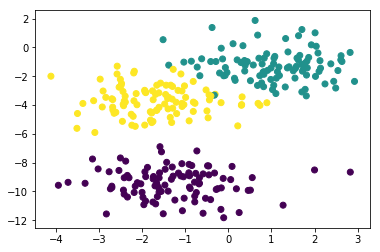

In [6]:
# exercise: create visualization to the above given data, see how the cluster is spread
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(X[:,0],X[:,1], c=Y)

***
<a id='linear'></a>
### 2.1 Linear models
#### 2.1.1 Linear regression - Diabetes data set
<font size='3'>

* a) Using Statsmodels

[Statsmodel - Linear Regression](https://www.statsmodels.org/stable/regression.html)<br>
[Fitting models using R-style formulas](https://www.statsmodels.org/devel/example_formulas.html)
</font>

In [7]:
# need to run the following to update statsmodel package 
# pip install --user statsmodels==0.10.0rc2 --pre

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, explained_variance_score
import statsmodels.formula.api as smf # enables using R-style formulas

In [9]:
# load data
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [10]:
diabetes.data.shape

(442, 10)

In [11]:
diabetes.data[0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [12]:
columns = 'age sex bmi map S1 S3 S3 S4 S5 S6'.split()
diabetes_df = pd.DataFrame(diabetes.data,columns = columns) 
y_df = pd.DataFrame(diabetes.target) # define target variable 
# y = diabetes.target 

# split data into traing and testing sets
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_df,y_df,test_size=0.2,random_state=2)
print(diabetes_X_train.shape,diabetes_y_train.shape)
print(diabetes_X_test.shape,diabetes_y_test.shape)

(353, 10) (353, 1)
(89, 10) (89, 1)


In [13]:
# combine target and variables 
diabetes_df1 = pd.concat([diabetes_X_train,diabetes_y_train], axis=1).rename(columns={0:'target'})

# fit model
diabetes_lm1 = smf.ols('target ~ age+sex+bmi+map+S1+S3+S3+S4+S5+S6', data = diabetes_df1).fit() # doesn't support '.'

# print summary
print(diabetes_lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     38.93
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.11e-50
Time:                        02:04:10   Log-Likelihood:                -1902.7
No. Observations:                 353   AIC:                             3827.
Df Residuals:                     342   BIC:                             3870.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    151.8833      2.878     52.783      0.0

In [14]:
# make predictions 
diabetes_pred1 = diabetes_lm1.predict(diabetes_X_test)
diabetes_pred1.head()

212    154.123507
422    204.817216
67     124.929880
89     106.093396
390    258.530357
dtype: float64

In [15]:
# MSE
print('Mean Square Error: %.2f' % mean_squared_error(diabetes_y_test,diabetes_pred1),'\n')

# R^2
print('r2 score: %.2f' % r2_score(diabetes_y_test,diabetes_pred1))

Mean Square Error: 3094.43 

r2 score: 0.44


In [16]:
# manual calculation 
y_pred = pd.DataFrame(diabetes_pred1)
rss = np.sum((y_pred - diabetes_y_test)**2)
tot = np.sum((diabetes_y_test - np.mean(diabetes_y_test))**2)
#reg = np.sum((y_pred_train-np.mean(diabetes_y_test))**2)
print('R-squared as coefficient of determination : ', 1-(rss/tot), '\n')

R-squared as coefficient of determination :  0    0.439939
dtype: float64 



*** 
<font size='3'>
    
* b) Using Sklearn<br>
**NOTE** : sklearn does not return p-value, have to manually calculate with significance test on X, y directly (sklearn is a ML-focused package -- ML doesn't care about p-values ☺️)

[Sklearn - Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)</font>

In [17]:
from sklearn import linear_model

In [18]:
# create linear regression object
diabetes_lm2 = linear_model.LinearRegression() 

# train the model using the training set 
diabetes_model2 = diabetes_lm2.fit(diabetes_X_train,diabetes_y_train)

# make predictions using the test set
diabetes_pred2 = diabetes_lm2.predict(diabetes_X_test)

# look at the first 5 predictions 
diabetes_pred2[0:5]

array([[154.1235067 ],
       [204.81721599],
       [124.92988001],
       [106.09339576],
       [258.53035681]])

In [19]:
# The coefficients
print('Coefficients: \n',diabetes_model2.coef_,'\n')

# MSE
print('Mean Square Error: %.2f' % mean_squared_error(diabetes_y_test,diabetes_pred2),'\n')

# R^2
print('r2 score: %.2f' % r2_score(diabetes_y_test,diabetes_pred2))

# explained variance score
print(explained_variance_score(diabetes_y_test,diabetes_pred2))

Coefficients: 
 [[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
   561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]] 

Mean Square Error: 3094.43 

r2 score: 0.44
0.4402180731772275


***
<a id='logistic'></a>
#### 2.2.2 Logistic regression - Breast cancer data set
<font size='3'>

* 1. Key notes
    - [Standarization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) is not required for a normal logistic regression, but it helps for interpreting feature importance, every value is rescaled such that mean = 0 and S.D = 1; However for regularized logistic regression, continuous variables should be standardized for best results. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
    - [Label Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) and [One Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
        - Label-encoding converts categorical labels to numerical values,should be applied before one-hot-encoding
        - One-hot-encoding converts numerical labels to dummy variables,creates sparse matrix.
    - [Evaluation metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics): accuracy, precision, recall, F1-score, ROC curve, Precision-Recall curve, etc
        - [When to use ROC vs. Precision-Recall Curve?](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)
* 2. Imbalance data: refers to target variable imbalanceness for classification problems. Most machine learning algorithms assume that data is equally distributed. In the case of imbalanced data, majority classes dominate over minority classes, causing the machine learning classifiers to be more biased towards majority classes. This causes poor classification of minority classes.That's why we should apply some techniques to remove the imbalanceness: 
    - [Under sampling](https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.under_sampling): reduces observations in over-represented group
    - [Over sampling - e.g.SMOTE](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html): increases observations in under-represented group (SMOTE = Synthetic Minority Over-sampling Technique)
        - [8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)
* 3. [Regularizations](https://www.youtube.com/watch?v=IXPgm1e0IOo):are shrinkage methods that shrink coefficient towards zero to prevent overfitting by reducing the variance of the model.
    - **Lasso regression (L1)**: adds “absolute value of magnitude” of coefficient as penalty term to the loss function,shrinks the less important feature's coefficients to zero, thus removing some features all together
    - **Ridge regression (L2)**: adds “squared magnitude” of coefficient as penalty term to the loss function


Other references:
* 1. [Sklearn - Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* 2. [Optimization](https://en.wikipedia.org/wiki/Limited-memory_BFGS)
* 3. [L1 and L2 Regularization Methods](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)</font>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,roc_curve,auc,roc_auc_score,classification_report

In [21]:
# load data 
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [22]:
cancer_df = pd.DataFrame(cancer.data)
cancer_target = cancer.target
cancer_df.shape

(569, 30)

In [23]:
cancer_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
cancer_df.columns = cancer.feature_names
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
# Fit model
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(cancer_df, cancer_target, test_size = 0.2, random_state = 1)

clf1 = LogisticRegression(random_state=1, solver='lbfgs',max_iter=3000) # initilize object 
cancer_clf1 = clf1.fit(cancer_X_train,cancer_y_train) # fit model.
cancer_pred_label = clf1.predict(cancer_X_test) # predict label
cancer_pred_prob = clf1.predict_proba(cancer_X_test) # predict probability 
cancer_pred_prob

array([[5.78889579e-01, 4.21110421e-01],
       [6.70986070e-01, 3.29013930e-01],
       [1.08867036e-03, 9.98911330e-01],
       [9.90505259e-01, 9.49474050e-03],
       [8.35345476e-01, 1.64654524e-01],
       [9.99403392e-01, 5.96607981e-04],
       [9.99472674e-01, 5.27326394e-04],
       [9.19781968e-01, 8.02180316e-02],
       [2.85131297e-04, 9.99714869e-01],
       [8.39355722e-03, 9.91606443e-01],
       [1.15980204e-03, 9.98840198e-01],
       [9.66393626e-01, 3.36063742e-02],
       [9.80160507e-01, 1.98394926e-02],
       [2.68435950e-03, 9.97315641e-01],
       [3.53089823e-01, 6.46910177e-01],
       [2.36517567e-01, 7.63482433e-01],
       [2.94250352e-03, 9.97057496e-01],
       [2.96697019e-03, 9.97033030e-01],
       [8.93241363e-05, 9.99910676e-01],
       [9.99816679e-01, 1.83320750e-04],
       [3.31258220e-03, 9.96687418e-01],
       [4.62786397e-03, 9.95372136e-01],
       [9.81685622e-01, 1.83143781e-02],
       [1.37707988e-02, 9.86229201e-01],
       [9.884279

In [26]:
# evaluation, NOTE: need to swap (tp=71, fn=1, fp=5, tn = 37)
confusion_matrix(cancer_y_test,cancer_pred_label)

array([[37,  5],
       [ 1, 71]])

In [27]:
print('Accuracy score: %0.3f' % accuracy_score(cancer_y_test,cancer_pred_label))
print('Recall score: %0.3f' % recall_score(cancer_y_test,cancer_pred_label)) # = 71/72
print('F1-score: %0.3f' % f1_score(cancer_y_test,cancer_pred_label)) # harmonian mean of precision and recall

Accuracy score: 0.947
Recall score: 0.986
F1-score: 0.959


In [28]:
print(classification_report(cancer_y_test,cancer_pred_label))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        42
           1       0.93      0.99      0.96        72

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



AUC: 0.985


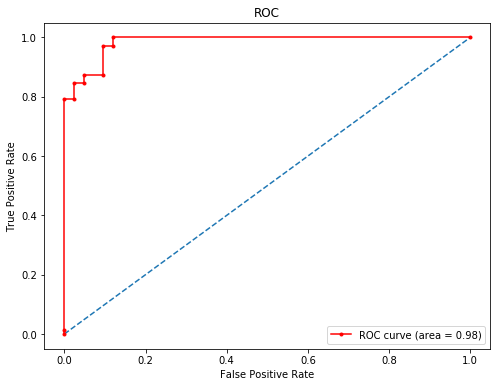

In [29]:
#### Plot ROC curve for Malignant
# calculate roc curve
fpr, tpr, thresholds = roc_curve(cancer_y_test,cancer_pred_prob[:,1])

# calculate AUC
auc = roc_auc_score(cancer_y_test,cancer_pred_prob[:,1])
print('AUC: %.3f' % auc)

fig, ax = plt.subplots(figsize = [8,6])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker = '.', color ='red',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Second model with SMOTE 
# need to install imblearn
#! pip install --user imblearn

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
# Check training label 
pd.DataFrame(cancer_y_train)[0].value_counts()

1    285
0    170
Name: 0, dtype: int64

In [33]:
# apply SMOTE
smt = SMOTE()
smt_cancer_X_train,smt_cancer_y_train = smt.fit_sample(cancer_X_train,cancer_y_train)
np.bincount(smt_cancer_y_train)

array([285, 285])

In [34]:
# fit model
clf2 = LogisticRegression(random_state=1, solver='lbfgs',max_iter=3000) # initilize object 
cancer_clf2 = clf2.fit(smt_cancer_X_train,smt_cancer_y_train) # fit model.
cancer_pred_label2 = clf2.predict(cancer_X_test) # predict label
cancer_pred_prob2 = clf2.predict_proba(cancer_X_test) # predict probability 


In [35]:
print(classification_report(cancer_y_test,cancer_pred_label2))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        42
           1       0.93      0.99      0.96        72

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



AUC1: 0.984788
AUC2: 0.986442


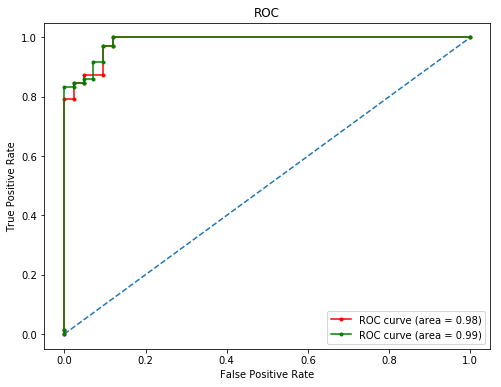

In [36]:
fpr2, tpr2, thresholds2 = roc_curve(cancer_y_test,cancer_pred_prob2[:,1])

# calculate AUC
auc2 = roc_auc_score(cancer_y_test,cancer_pred_prob2[:,1])
print('AUC1: %.6f' % auc)
print('AUC2: %.6f' % auc2)

fig, ax = plt.subplots(1,1,figsize = [8,6])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker = '.', color ='red',label='ROC curve (area = %0.2f)'% auc)
plt.plot(fpr2, tpr2, marker = '.', color ='green',label='ROC curve (area = %0.2f)'% auc2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

***
<a id='trees'></a>
### 2.2 Tree based models
<font size='3'>

* 1. [Decision Trees](#decision)
* 2. [Random Forest](#rf)
* 3. [Gradient Boosted Trees](#xgb)
</font>

***
<a id='decision'></a>
####  2.2.1 Decision trees<br>

<font size='3'>

* Decision trees are built using a heuristic called **recursive partitioning**. This approach is also commonly known as **divide and conquer** because it splits the data into subsets, which are then split repeatedly into even smaller subsets, and so on and so forth until the process stops when the algorithm determines the data within the subsets are sufficiently homogenous, or another stopping criterion has been met.
* A non-parametric method
* Can be used for both numerical prediction and classification problems
* Good for interpretation, but prone to overfit as the depth of the tree increases

</font>
<img src='day2 data and image/dt.png' width='500'>


<font size='3'>
    
* **How does it work?**
    * 1. Root node represents the entire dataset
    * 2. Chooses the feature most predictive of the target class to split upon each time
        - Information Gain: measure difference between entropy before split and after split for a feature 
        - Gain Ratio: normalizing the information gain using Split Info
        - [Gini Index](https://en.wikipedia.org/wiki/Decision_tree_learning): is a metric that measures the probability from a randomly chosen element (here an iris) to be incorrectly classified, used for classification problems, feature with small Gini index will be picked
    * 3. Continues to devide and conquer the data, until a stopping criterion is reached:
        - All (or nearly all) of the examples at the node have the same class
        - No remaining features to distinguish among the examples
        - The tree has grown to a predefined size limit 


* **Resources**
    - [Decision Tree in Sklearn](https://scikit-learn.org/stable/modules/tree.html#classification)
    - [Decision Tree Classification in Python Example](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)
</font>

### Decision Tree Example - Iris data

In [37]:
iris = datasets.load_iris()
#print(iris.DESCR)

In [38]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # import classifier module
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [39]:
iris_df = pd.DataFrame(iris.data)
iris_target = iris.target
iris_df.columns = iris.feature_names
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
iris_X_train,iris_X_test,iris_y_train,iris_y_test = train_test_split(iris_df,iris_target,test_size = 0.2, random_state = 1)


In [42]:
iris_clf = DecisionTreeClassifier(random_state=1) # initialize 
iris_clf = iris_clf.fit(iris_X_train,iris_y_train) # fit 
iris_pred = iris_clf.predict(iris_X_test) # predict 

In [43]:
print('Acciracy: %0.6f' % metrics.accuracy_score(iris_y_test,iris_pred))

Acciracy: 0.966667


In [44]:
! pip install --user pandas_ml

In [45]:
from pandas_ml import ConfusionMatrix

In [46]:
print('Confusion Matrix:','\n', ConfusionMatrix(iris_y_test,iris_pred))

Confusion Matrix: 
 Predicted   0   1  2  __all__
Actual                       
0          11   0  0       11
1           0  12  1       13
2           0   0  6        6
__all__    11  12  7       30


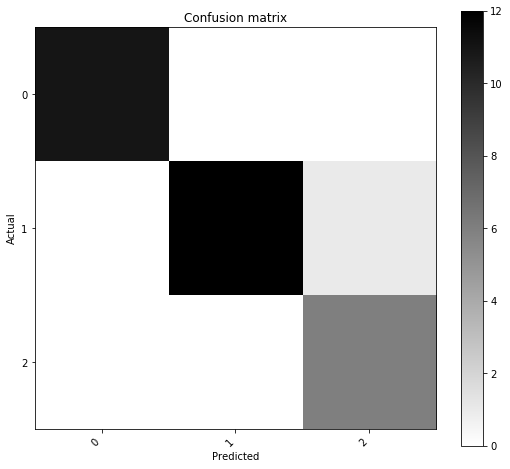

In [47]:
ConfusionMatrix(iris_y_test,iris_pred).plot()

In [48]:
print(classification_report(iris_y_test,iris_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [49]:
#! pip install --user pydotplus

In [50]:
# Another way to plot tree without graphviz
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams

In [51]:
rcParams['figure.figsize'] = 80,50
tree.plot_tree(iris_clf)
plt.show()

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [ ]:
# from sklearn.externals.six import StringIO # read and write strings as files
# from IPython.display import Image 
# import pydotplus # provides a Python Interface to Graphviz’s Dot language
# iris_dot = StringIO()
# tree.export_graphviz(iris_clf,out_file=iris_dot,
#                                 feature_names=iris.feature_names,
#                                 class_names=iris.target_names,
#                                 filled=True,rounded=True,
#                                 special_characters=True)
# iris_graph = pydotplus.graph_from_dot_data(iris_dot.getvalue())
# # iris_graph.write('iris2.png')
# Image(iris_graph.create_png())

* In the root node, the algorithm has found that among all the possible splits the split with petal width = 0.8 cm gives the lowest Gini impurity.
* In the root node, if petal width (cm) <= 0.8 is TRUE, then Setosa

***
<a id='rf'></a>
####  2.2.2 Random Forest<br>
<font size='3'>

* Random forest is a set of parallel decision trees
* Prevent overfitting by bagging (boostrap aggregation):
    - Learn many classifiers, each with a subset of data
    - Combine through model averaging
    
* Strengths: 
    - All-purpose model that performs well on most problems
    - Can handle noisy or missing data as well as categorical or continuous features
    - Select only the most important features 
    - Can be used on large data
    - Provide [feature importance](https://medium.com/@srnghn/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3): is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.
* Weaknesses:
    - Some work to tune the model to the data 
</font>
<img src='day2 data and image/rf.jpg' width='600'>

[Random Forest Classifier - Sklearn](https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)<br>
[Random Forest Regressor - Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

### Random Forest Rregression Example - Boston Housing Price

In [52]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_target = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(boston_df, boston_target, \
                                                                                test_size = 0.2, random_state=1)


In [56]:
rf_reg = RandomForestRegressor(n_estimators=50,random_state=1,max_depth=10) # initialize 
boston_rf = rf_reg.fit(boston_X_train,boston_y_train) # fit 
boston_train_pred = boston_rf.predict(boston_X_train)
boston_test_pred = boston_rf.predict(boston_X_test) # predict 


In [57]:
rf_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [58]:
r2_train,r2_test = r2_score(boston_y_train, boston_train_pred),r2_score(boston_y_test, boston_test_pred)
mse_train, mse_test = mean_squared_error(boston_y_train, boston_train_pred),mean_squared_error(boston_y_test, boston_test_pred)

print('MSE on train: %0.3f, test: %0.3f' % (mse_train,mse_test))
print('R2-square on train: %0.3f, test: %0.3f' % (r2_train,r2_test))


MSE on train: 1.496, test: 8.379
R2-square on train: 0.981, test: 0.915


* Our model is little bit over fitting since we observe higher error on test data than for training data, but the model still have a good R2 square for unknown data (0.915).
* To avoid over-fitting in random forest, the main thing you need to do is optimize a tuning parameter that governs the number of features that are randomly chosen to grow each tree from the bootstrapped data. Typically, you do this via 𝑘-fold cross-validation, where 𝑘∈{5,10}, and choose the tuning parameter that minimizes test sample prediction error.
* In addition, growing a larger forest will improve predictive accuracy, although there are usually diminishing returns once you get up to several hundreds of trees

In [59]:
importance = rf_reg.feature_importances_
list(zip(boston.feature_names,importance))

[('CRIM', 0.03894315637375459),
 ('ZN', 0.0009495097737589508),
 ('INDUS', 0.006508656245440881),
 ('CHAS', 0.0006206729347351866),
 ('NOX', 0.02532372393709364),
 ('RM', 0.2881091070977787),
 ('AGE', 0.016437468575246462),
 ('DIS', 0.06642358958265869),
 ('RAD', 0.003796360649709578),
 ('TAX', 0.013296272722840376),
 ('PTRATIO', 0.01847185392062615),
 ('B', 0.01371191090008056),
 ('LSTAT', 0.5074077172862762)]

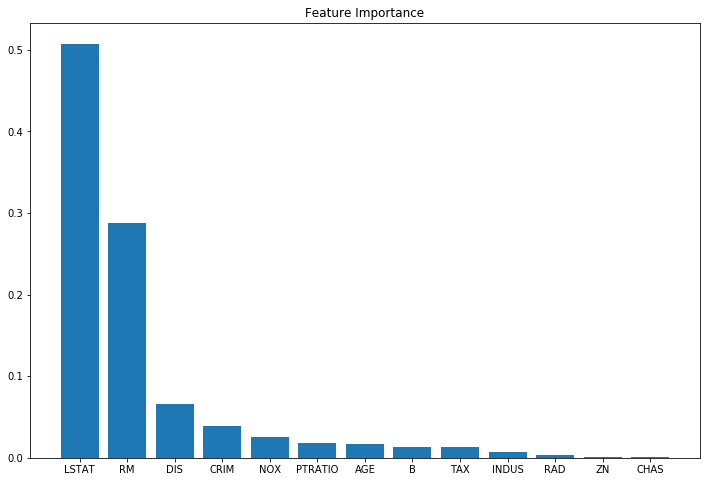

In [60]:
# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [boston.feature_names[i] for i in indices]

# Create plot
fig,ax = plt.subplots(figsize = [12,8])

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(boston_X_train.shape[1]), importance[indices])

# Add feature names as x-axis labels
plt.xticks(range(boston_X_train.shape[1]), names) # , rotation=90

# Show plot
plt.show()

### Random Forest Classification Example - Iris data

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [62]:
rf_clf = RandomForestClassifier(n_estimators=500,max_depth=5,random_state=1)
iris_rf = rf_clf.fit(iris_X_train,iris_y_train)
iris_rf_pred = iris_rf.predict(iris_X_test)
print('Confusion Matrix:','\n', ConfusionMatrix(iris_y_test,iris_rf_pred))

Confusion Matrix: 
 Predicted   0   1  2  __all__
Actual                       
0          11   0  0       11
1           0  12  1       13
2           0   0  6        6
__all__    11  12  7       30


In [63]:
accuracy_score(iris_y_test,iris_rf_pred)

0.9666666666666667

In [64]:
print(classification_report(iris_y_test,iris_rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [65]:
list(zip(iris.feature_names, rf_clf.feature_importances_))

[('sepal length (cm)', 0.09347440361140277),
 ('sepal width (cm)', 0.025681958095061155),
 ('petal length (cm)', 0.4326989568097147),
 ('petal width (cm)', 0.44814468148382103)]

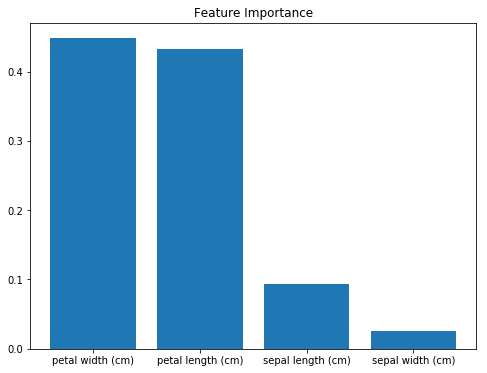

In [66]:
iris_indices = np.argsort(rf_clf.feature_importances_)[::-1]

iris_names = [iris.feature_names[i] for i in iris_indices]


fig,ax = plt.subplots(figsize = [8,6])
plt.title("Feature Importance")

plt.bar(range(iris_X_train.shape[1]), rf_clf.feature_importances_[iris_indices])

plt.xticks(range(iris_X_train.shape[1]), iris_names) # , rotation=90
plt.show()

***
<a id='xgb'></a>
####  2.2.3 Gradient Boosted Trees<br>
<font size='3'>

* **Gradient boosted trees (GBT)** is one of the most powerful techniques for building predictive models. GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree. 
    - Bagging (Parallel) vs. Boosting (Sequential)
    - [Intuition behind gradient boosting](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d)
    - The learning rate (shrinkage or eta) controls how hard each new tree tries to correct remaining mistakes from previous round.
        - High learning rate: more complex trees
        - Low learning rate: simple trees
    - [Feature importance in Gradient Boosting](https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/): generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance. 
    - Pros and Cons 
    
**Pros**   |   **Cons**
:---| :---
Often best off-the-shelf accuracy on many problems | Like random forest, not intuitive for interpretation
Using model for prediction requires only modest memory and is fast | Require careful tuning of the learning rate and other parameters
Doesn't require careful normalization of features to perform well | Training can require significant computation
Like decision trees, handles of mixture of feature types | Like decision trees,not recommended for problems with very high dimensional sparse features, for accuracy and computational cost reasons</font>

[Intro to Gradient Boosting Algorithm for ML](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)<br>
[5-minutes video of GBT](https://www.coursera.org/lecture/python-machine-learning/gradient-boosted-decision-trees-emwn3)<br>
[Underlying math of GBT](https://www.coursera.org/lecture/advanced-machine-learning-signal-processing/boosting-and-gradient-boosted-trees-8MEjw)<br>
[GradientBoostingClassifier Sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)<br>
[GradientBoostingRegressor Sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)<br>
<font size='3'>
***
* **Extreme Gradient Boosting (XGBoost)** is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.It's a perfect combination of software and hardware optimization techniques to yield superior results using less computing resources in the shortest amount of time.
    - Pros:
        - Execution speed: really fast when compare to other implementation of gradient boosting
        - Accuracy: dominates structured datasets on classification and regression predictive modeling problems.It's the go-to algorithm for competition winners on the Kaggle competitive data science platform
    - Cons: Not intuitive for interpretation, yet this is changing</font>

[5-minutes video on Boosting](https://www.coursera.org/lecture/competitive-data-science/boosting-Ra7di)<br>
[XGBoost algorithm](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)<br>
[XGBoost Python API Reference](https://xgboost.readthedocs.io/en/latest/python/python_api.html)<br>
[XGBoost parameters - Github](https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst)

### XGBoost Example - Boston Housing Price

In [67]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns= boston.feature_names)
boston_target = boston.target

In [68]:
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [69]:
! pip install --user xgboost

In [70]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [71]:
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(boston_df,boston_target, \
                                                                                test_size = 0.2,random_state=1)

In [72]:
# initialize model
xgb_reg = xgb.XGBRegressor(objecgtive = 'reg:linear',
                           max_depth= 5,
                           colsample_bytree= 0.3, # Subsample ratio of columns when constructing each tree
                           learning_rate = 0.1,
                           alpha = 10,
                           n_estimators = 20) # number of trees for each model
                                   

In [73]:
boston_xgb_reg = xgb_reg.fit(boston_X_train,boston_y_train) # fit 
boston_xgb_train_pred = boston_xgb_reg.predict(boston_X_train) # predict on training data
boston_xgb_test_pred = boston_xgb_reg.predict(boston_X_test) # predict on test data
boston_xgb_test_pred[0:5]

array([26.042677, 24.6052  , 17.885344, 18.838455, 15.505324],
      dtype=float32)

In [74]:
boston_xgb_train_rmse = np.sqrt(mean_squared_error(boston_y_train,boston_xgb_train_pred))
boston_xgb_test_rmse = np.sqrt(mean_squared_error(boston_y_test,boston_xgb_test_pred))

boston_xgb_train_r2 = r2_score(boston_y_train,boston_xgb_train_pred)
boston_xgb_test_r2 = r2_score(boston_y_test,boston_xgb_test_pred)
print('RMSE train:{0:0.5f}, RMSE test:{1:0.5f}'.format(boston_xgb_train_rmse,boston_xgb_test_rmse))
print('R-squared train: {0:0.5f}, R-squared test:{1:0.5f}'.format(boston_xgb_train_r2,boston_xgb_test_r2))

RMSE train:4.38312, RMSE test:5.75686
R-squared train: 0.76218, R-squared test:0.66465


##### k-fold Cross Validation using XGBoost with early stopping
This step gives us the optimal number of trees

In [75]:
# Create DMatrix object : optimize both memory efficiency and training speed
dmatrix_train = xgb.DMatrix(boston_X_train,label=boston_y_train)
dmatrix_test= xgb.DMatrix(boston_X_test,label=boston_y_test)


In [76]:
# create a hyperparameter dictionary first 
params = {'objecttive':'reg:linear',
          'colsample_bytree': 0.3, 
          'learning_rate': 0.1,
          'max_depth': 5, 
          'alpha': 10}

# CV error needs to decrease every early_stopping_rounds to continue
# Last entry in evaluation history is the one from best iteration
cv_results = xgb.cv(dtrain=dmatrix_train,
                    params=params,
                    nfold=3,
                    num_boost_round=50,            # number of boosting iterations
                    early_stopping_rounds=10,
                    metrics='rmse',
                    as_pandas=True, seed=1)

cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.578803,0.340522,21.577863,0.756708
1,19.674324,0.384763,19.668711,0.768121
2,17.919149,0.387578,17.941937,0.797197
3,16.402814,0.388869,16.459531,0.871174
4,14.954941,0.368357,15.001842,0.898155


In [77]:
print('Best number of trees: {}'.format(cv_results.shape[0]))

# train model using the best paramaters from CV
xgb_reg.set_params(n_estimators = cv_results.shape[0])
boston_xgb_reg2 = xgb_reg.fit(boston_X_train,boston_y_train) 

# predict
boston_xgb_train_pred2 = boston_xgb_reg2.predict(boston_X_train)# predict on training data
boston_xgb_test_pred2 = boston_xgb_reg2.predict(boston_X_test)# predict on test data
boston_xgb_test_pred2[0:5]

Best number of trees: 50


array([30.874847, 28.591276, 19.2338  , 20.411242, 18.063152],
      dtype=float32)

In [78]:
boston_xgb_train_rmse2 = np.sqrt(mean_squared_error(boston_y_train,boston_xgb_train_pred2))
boston_xgb_test_rmse2 = np.sqrt(mean_squared_error(boston_y_test,boston_xgb_test_pred2))

boston_xgb_train_r22 = r2_score(boston_y_train,boston_xgb_train_pred2)
boston_xgb_test_r22 = r2_score(boston_y_test,boston_xgb_test_pred2)
print('RMSE train:{0:0.5f}, RMSE test:{1:0.5f}'.format(boston_xgb_train_rmse2,boston_xgb_test_rmse2))
print('R-squared train: {0:0.5f}, R-squared test:{1:0.5f}'.format(boston_xgb_train_r22,boston_xgb_test_r22))

RMSE train:1.61148, RMSE test:3.84023
R-squared train: 0.96785, R-squared test:0.85078


In [79]:
eval_set = [(boston_X_train,boston_y_train),(boston_X_test,boston_y_test)]
eval_metric=['rmse']

xgb_reg.set_params(n_estimators = 200)
%time xgb_reg.fit(boston_X_train,boston_y_train,eval_metric=eval_metric,eval_set=eval_set,verbose=True,\
                  early_stopping_rounds=10)


[0]	validation_0-rmse:21.5546	validation_1-rmse:21.9504
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:19.6716	validation_1-rmse:20.1146
[2]	validation_0-rmse:17.9594	validation_1-rmse:18.521
[3]	validation_0-rmse:16.3068	validation_1-rmse:16.793
[4]	validation_0-rmse:14.9002	validation_1-rmse:15.4611
[5]	validation_0-rmse:13.5557	validation_1-rmse:14.1666
[6]	validation_0-rmse:12.3584	validation_1-rmse:13.0321
[7]	validation_0-rmse:11.3302	validation_1-rmse:12.0876
[8]	validation_0-rmse:10.4411	validation_1-rmse:11.2675
[9]	validation_0-rmse:9.62503	validation_1-rmse:10.5098
[10]	validation_0-rmse:8.7985	validation_1-rmse:9.65251
[11]	validation_0-rmse:8.05728	validation_1-rmse:8.962
[12]	validation_0-rmse:7.40153	validation_1-rmse:8.34183
[13]	validation_0-rmse:6.81107	validation_1-rmse:7.803
[14]	validation_0-rmse:6.28304	validation_1-rmse:7.32706
[15

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objecgtive='reg:linear', objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

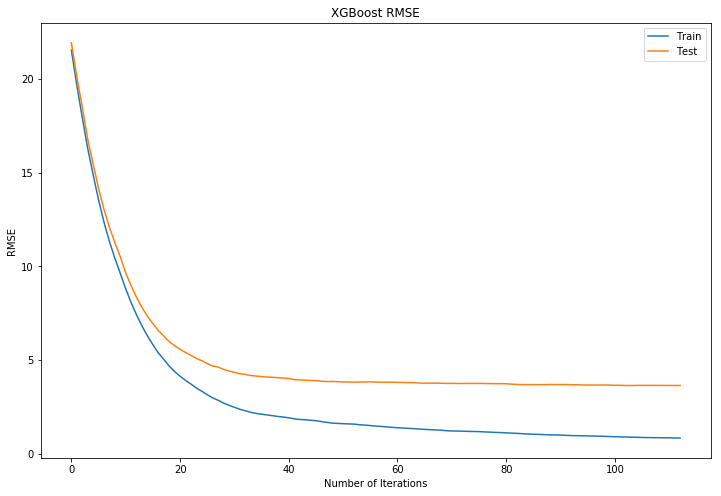

In [80]:
results = xgb_reg.evals_result()
trees = len(results['validation_0']['rmse'])
x_axis = range(0,trees)

# plot rmse 
fig, ax = plt.subplots(figsize=[12,8])
plt.plot(x_axis, results['validation_0']['rmse'], label = 'Train')
plt.plot(x_axis, results['validation_1']['rmse'], label = 'Test')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

* **Paramater tuning**
    - Choose a relatively **high learning rate**. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the **optimum number of trees for this learning rate**. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
    - Tune **tree-specific parameters** ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree
    - Tune **regularization parameters*8 (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
    - **Lower the learning rate** and decide the optimal parameters .

[XGBoost paramater tuning example](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

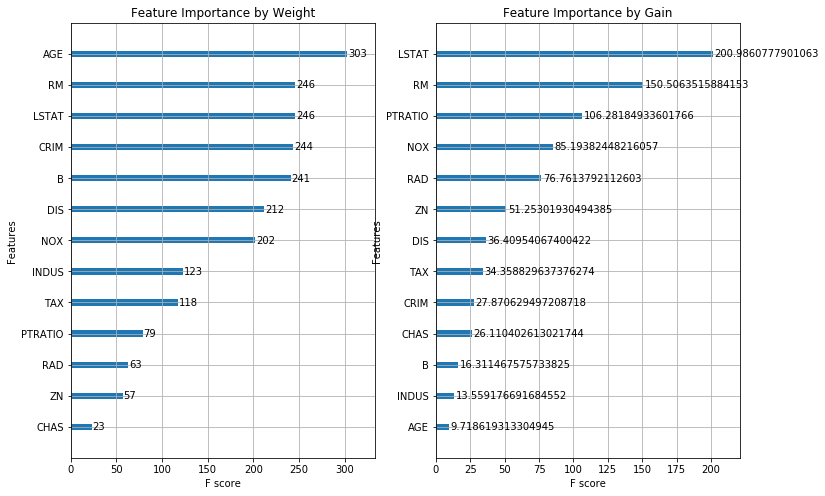

In [81]:
# plot importance : how many times was this variable split on 
fig, ax = plt.subplots(1,2,figsize=[12,8])
# ”weight” is the number of times a feature appears in a tree
xgb.plot_importance(boston_xgb_reg2,ax=ax[0], importance_type='weight', title='Feature Importance by Weight')
# ”gain” is the average gain of splits which use the feature
xgb.plot_importance(boston_xgb_reg2,ax=ax[1], importance_type='gain',title='Feature Importance by Gain')

plt.show()

In [82]:
from IPython.display import HTML

<a id='CNN'></a>
### 2.3 Neural network and CNN

<font size='3'>

* **Artificial Neural Network(ANN)** models the relationship between a set of input signals and an output signal using a model derived from our understanding of how a biological brain responds to stimuli from sensory inputs.
<img src='day2 data and image/nn.png' width='400'>

* **[CNN](https://en.wikipedia.org/wiki/Convolutional_neural_network)**
    - In deep learning, a CNN is a class of deep learning networks, most commonly applies to analyzing visual imagery. 
    - How does CNN work?
        1. CNN receives an input **feature map**: 3D matrix (length, width,color-channel). 
        2. **Convolution**: extracts tiles of the input feature map, and applies filters to them to compute new features. producing an output feature map. Convolutions are defined by two parameters:
            - **Size of the tiles that are extracted** (typically 3$\times$3 or 5$\times$5 pixels)
            - **The depth of the output feature map**,which corresponds to the number of filters that are applied
<img src='day2 data and image/convolution_overview.gif'>
<img src='day2 data and image/convolution_example.svg'>
<img src='day2 data and image/convolution_calculation.png'>
            - During the training, the 'CNN' learns the optimal values for the filter matrices that enable it to extract meaningful features (textures,edges,shapes) from the input feature map.As the number of filters applied to the input increases, so does the number of features the CNN can extract.
        3. [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) (Rectified Linear Unit):
            - ReLU transformation is applied following each convolution operation, in order to introduce nonlinearity into the model.
            - F(x) = max(0,x), returns x for all values of x>0, and returns 0 for all values $\leq$0.
        4. Pooling: comes after ReLU, in which CNN reduces the number of dimensions of the feature map, while still preserving the most critical feature information.e.g. max pooloing.
            - **Size** of the max-pooling filter (typically 2$\times$2 pixels)  
            - **Stride**: the distance, in pixels, seperating each extracted tile.                                                           
<img src='day2 data and image/maxpool_animation.gif'>
        5. Fully Connected Layers:at the end of a CNN are one or more fully connected layers. 
            - Perform classification based on the feature extracted by the convolutions.
            - Typically,the final fully connected layer contains a softmax activation function, which outputs a probability value from 0 to 1 for each of the labels the model is trying to predict.
</font>

<img src='day2 data and image/cnn_architecture.svg'>

[Tensors Illustration](https://hackernoon.com/learning-ai-if-you-suck-at-math-p4-tensors-illustrated-with-cats-27f0002c9b32)<br>
[Intro to CNN - Google](https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks)<br>
[Keras Sequential model Documentation](https://keras.io/getting-started/sequential-model-guide/#specifying-the-input-shape)<br>
[](https://www.linkedin.com/pulse/deep-learning-cnn-edge-detection-chen-yang/)


### Convolutional Neural Networks (CNN) Example - MNIST data
The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) is one of the most common datasets used for image classification and accessible from many different resources. It contains 60,000 training images and 10,000 testting images taken from American Census Bureau employees and American high school students. X_train and X_test contains greyscale RGB codes (from 0 to 255) while y_train nad y_test contains labels from 0 to 9 which represents which number they actually are. 


In [83]:
## ! pip install tensorflow
# ! pip install kera

In [84]:
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [85]:
seed = 7
np.random.seed(seed)

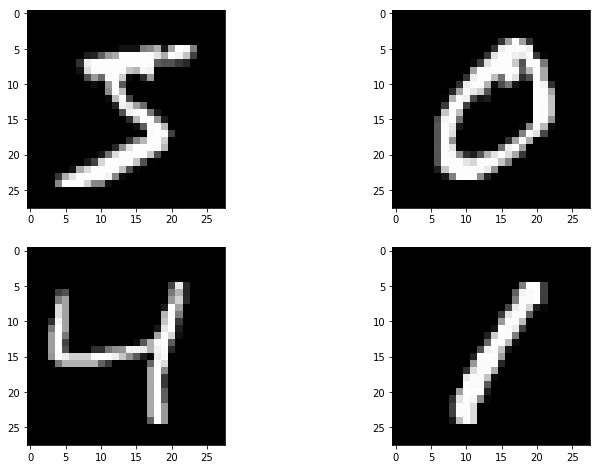

In [86]:
# download mnist data 
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()
# plot 4 images 
fig = plt.subplots(figsize=[12,8])
plt.subplot(221)
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))
plt.show()

In [87]:
X_train.shape, X_test.shape # image size 28*28 pixel

((60000, 28, 28), (10000, 28, 28))

- In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions **[pixels][width][height]**.
- For RGB case, the dimension pixel will be 3 for red, green and blue components. 
- For MNIST data where the pixel values are gray scale, the pixel is set to 1.
- Normalization for pixel values to range [0,1] is requried for Neural Network models

In [88]:
# Reshape to 4-dims array 
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

# Normalize RGB by deviding it to the max RGB value
X_train = X_train/255
X_test = X_test/255

print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('Number of images in X_train: ', X_train.shape[0])
print('Number of images in X_tests :', X_test.shape[0])

X train shape:  (60000, 28, 28, 1)
X test shape:  (10000, 28, 28, 1)
Number of images in X_train:  60000
Number of images in X_tests : 10000


In [89]:
# Buidling CNN
model = Sequential() 
model.add(Conv2D(28, kernel_size=(5,5),input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # flatten the 2D array for fully connected layer 
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2)) # help reducing interdependent learning amongst the neurons by ignoring certain neurons at random at each training stage 
model.add(Dense(10,activation='softmax'))

# Compile model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=10,batch_size=200, verbose=2)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.2567 - acc: 0.9248 - val_loss: 0.0916 - val_acc: 0.9728
Epoch 2/10
 - 9s - loss: 0.0832 - acc: 0.9752 - val_loss: 0.0533 - val_acc: 0.9827
Epoch 3/10
 - 10s - loss: 0.0543 - acc: 0.9833 - val_loss: 0.0494 - val_acc: 0.9841
Epoch 4/10
 - 10s - loss: 0.0420 - acc: 0.9867 - val_loss: 0.0447 - val_acc: 0.9849
Epoch 5/10
 - 9s - loss: 0.0314 - acc: 0.9901 - val_loss: 0.0405 - val_acc: 0.9870
Epoch 6/10
 - 10s - loss: 0.0271 - acc: 0.9911 - val_loss: 0.0415 - val_acc: 0.9868
Epoch 7/10
 - 10s - loss: 0.0204 - acc: 0.9935 - val_loss: 0.0413 - val_acc: 0.9869
Epoch 8/10
 - 9s - loss: 0.0190 - acc: 0.9938 - val_loss: 0.0359 - val_acc: 0.9896
Epoch 9/10
 - 9s - loss: 0.0159 - acc: 0.9948 

In [90]:
# final evaluation 
scores = model.evaluate(X_test, y_test,verbose=0)
print('CNN Accuracy: {:0.5f}'.format(scores[1]*100))

CNN Accuracy: 98.93000


9


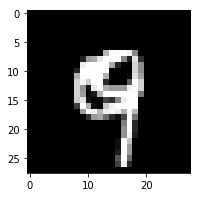

In [95]:
# Predict
rcParams['figure.figsize'] = 3,3 # set figsize 
image_index=4444
plt.imshow(X_test[image_index].reshape(28,28),cmap='gray')
pred = model.predict(X_test[image_index].reshape(1,28,28,1))
print(pred.argmax())

***
<a id='practice'></a>
## Practice
<font size='3'>
    
**XGBoost**
* Please change the paramaters in 'xgb.XGBRegressor()' of the XGBoost model to see how it changes the model's performance
* Please change 'n_estimator' in 'xgb_reg.set_params(n_estimators = 200)' to see how it changes the 'XGBoost RMSE' plot
* Please remove 'early_stopping_rounds=10)' from 'xgb_reg.fit()' to see how it changes the 'XGBoost RMSE' plot
</br>

**CNN**
* Please try to change the paramaters of the CNN to see how it changes the model. 
</font>